# 数据预处理

## 数据缩放的例子

sklearn 自带4种数据变换的方法：

- StandardScaler:保证放缩后特征均值为0，方差为1，所有特征放缩后都位于同一量级，但不能保证最大最小值
- RobustScaler:与标准放缩类似使用中位数和四分位数，而不是均值方差。可以忽略异常点的影响
- MinMaxScaler:使所有数据位于0～1之间
- Normalizer:使得特征向量的欧式长度都为1，角度作为区分数据的因素

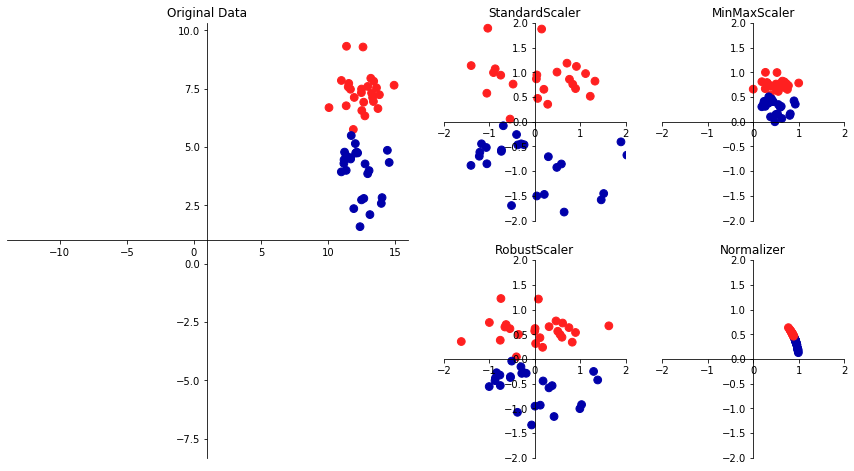

In [41]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

mglearn.plots.plot_scaling()

## 应用数据变换

加载乳腺癌数据

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

canser = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


放缩数据

对训练集和测试集都使用训练集的标准进行放缩，因此测试集的范围不是严格在0-1的

In [43]:
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(suppress=True)
scaler = MinMaxScaler().fit(X_train)

# 获取变换后的数据
X_train_scalled = scaler.transform(X_train)

print('transformed shape:', X_train_scalled.shape)
print('per-feature minimum before scaling:\n', X_train.min(axis=0)[:5])
print('per-feature maximum before scaling:\n', X_train.max(axis=0)[:5])
print('per-feature minimum after scaling:\n', X_train_scalled.min(axis=0)[:5])
print('per-feature maximum after scaling:\n', X_train_scalled.max(axis=0)[:5])

# 对测试集进行变换

X_test_scaled = scaler.transform(X_test)
print('per-feature minimum after scaling:\n', X_test_scaled.min(axis=0)[:5])
print('per-feature maximum after scaling:\n', X_test_scaled.max(axis=0)[:5])


transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981     9.71     43.79    143.5       0.05263]
per-feature maximum before scaling:
 [  28.11     39.28    188.5    2501.        0.1634]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1.]
per-feature minimum after scaling:
 [0.0336031  0.0226581  0.03144219 0.01141039 0.14128374]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075]


## 对训练集和测试集进行相同的缩放

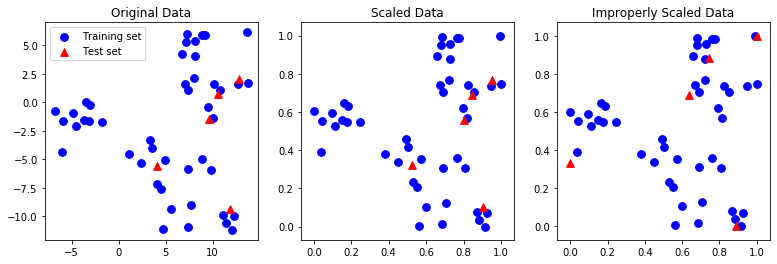

In [48]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# 绘制训练集和测试集
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c='b', label='Training set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1],
                marker='^', c='r', label='Test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label='Training set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                marker='^', c='r', label='Test set', s=60)
axes[1].set_title('Scaled Data')

test_scaler = MinMaxScaler().fit(X_test)

X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label='Training set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c='r', label='Test set', s=60)
axes[2].set_title('Improperly Scaled Data')

plt.show()

## 应用于SVM的例子

In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target, random_state=0)

svm = SVC(C=100).fit(X_train, y_train)

print('svm acc:', svm.score(X_test, y_test))

# MinMaxScaller
min_max_scaller = MinMaxScaler().fit(X_train)
X_train_scalled = min_max_scaller.transform(X_train)
X_test_scalled = min_max_scaller.transform(X_test)

svm.fit(X_train_scalled, y_train)
print('min max scalled svm acc:', svm.score(X_test_scalled, y_test))

# StandardScaller
standard_scaller = StandardScaler().fit(X_train)
X_train_scalled = standard_scaller.transform(X_train)
X_test_scalled = standard_scaller.transform(X_test)

svm.fit(X_train_scalled, y_train)
print('min max scalled svm acc:', svm.score(X_test_scalled, y_test))

svm acc: 0.6293706293706294
min max scalled svm acc: 0.965034965034965
min max scalled svm acc: 0.958041958041958
